# Task 1

<div style="max-width: 50%;">
<details>
    <summary>Details</summary>    
    As discussed during Lecture 2, the first phase of a Data Mining project typically includes getting familiar with the domain and pre-processing the dataset in a suitable manner. In this
    part of the assignment, we will go through those steps.
</details>
</div>

## Task 1 a
<div style="max-width: 50%;">
<details>
    <summary>Detail</summary>    
    Start with exploring the raw data that is available: <br><br>
    - Notice all sorts of properties of the dataset: how many records are there, how many
    attributes, what kinds of attributes are there, ranges of values, distribution of values,
    relationships between attributes, missing values, and so on. A table is often a suitable
    way of showing such properties of a dataset. Notice if something is interesting (to you,
    or in general), make sure you write it down if you find something worth mentioning.<br><br>
    - Make various plots of the data. Is there something interesting worth reporting? Re-
    port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
    convey? Please select essential and interesting plots for discussion, as you have limited
    space for reporting your findings.
</details>
</div>


In [34]:
import pandas as pd

data = pd.read_csv('dataset_mood_smartphone.csv')

data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [162]:
# Group the data by 'id' and 'time' and count the number of occurrences
similar_time_records = data.groupby(['id', 'time']).size().reset_index(name='count')

# Filter the records where count is greater than 1
similar_time_records = similar_time_records[similar_time_records['count'] > 1]

# Merge with the original data to get the variables registered at those times
similar_time_records = pd.merge(similar_time_records, data, on=['id', 'time'], how='left')

# Display the similar time records with variables
print(similar_time_records[['id', 'time', 'variable']])


            id                time            variable
0      AS14.01 2014-02-26 13:00:00                mood
1      AS14.01 2014-02-26 13:00:00  circumplex.arousal
2      AS14.01 2014-02-26 13:00:00  circumplex.valence
3      AS14.01 2014-02-26 15:00:00                mood
4      AS14.01 2014-02-26 15:00:00  circumplex.arousal
...        ...                 ...                 ...
25773  AS14.33 2014-05-30 20:00:00  circumplex.valence
25774  AS14.33 2014-05-30 20:00:00            activity
25775  AS14.33 2014-05-31 12:00:00                mood
25776  AS14.33 2014-05-31 12:00:00  circumplex.arousal
25777  AS14.33 2014-05-31 12:00:00  circumplex.valence

[25778 rows x 3 columns]


In [46]:
data.columns

Index(['id', 'time', 'variable', 'value'], dtype='object')

In [100]:
data['variable'].describe()

count     376710
unique        19
top       screen
freq       96578
Name: variable, dtype: object

In [134]:
# Pivot the data dataframe
pivot_df = data.pivot_table(index=data.index, columns='variable', values='value', fill_value=0)

# Rename the columns
pivot_df.columns = [f'{col}_value' for col in pivot_df.columns]

# Concatenate the pivot_df with the original data dataframe
new_data = pd.concat([data, pivot_df], axis=1)

new_data.describe()

,Unnamed: 0,value,activity_value,appCat.builtin_value,appCat.communication_value,appCat.entertainment_value,appCat.finance_value,appCat.game_value,appCat.office_value,appCat.other_value,...,appCat.travel_value,appCat.unknown_value,appCat.utilities_value,appCat.weather_value,call_value,circumplex.arousal_value,circumplex.valence_value,mood_value,screen_value,sms_value
count,3.769120e+05,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,...,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000,376710.000000
mean,4.501273e+05,40.665313,0.007069,4.492370,8.546106,2.705694,0.054228,0.277089,0.338165,0.524151,...,0.345491,0.113547,0.122383,0.013639,0.013907,-0.001465,0.010018,0.104709,19.313858,0.004773
std,5.411519e+05,273.726007,0.053854,204.932138,59.783134,71.226371,2.237543,16.315349,55.086041,16.477975,...,21.751285,6.376355,5.174617,0.833144,0.117106,0.128757,0.115555,0.858599,132.660727,0.068921
min,1.000000e+00,-82798.871000,0.000000,-82798.871000,0.000000,-0.011000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000
25%,9.422875e+04,2.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.274385e+05,7.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.160412e+05,29.356000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857000,0.000000
max,1.427711e+07,33960.246000,1.000000,33960.246000,9830.777000,32148.677000,355.513000,5491.793000,32708.818000,3892.038000,...,10452.615000,2239.937000,1802.649000,344.863000,1.000000,2.000000,2.000000,10.000000,9867.007000,1.000000


In [12]:
missing_data = data[data.isnull().any(axis=1)]
print("missing data:")
print(missing_data)
missing_values = data.isnull().sum()
print("missing values:")
print(missing_values)
missing_variables = missing_data['variable'].unique()
print("variables with missing data:")
print(missing_variables)

amount_participants = data['id'].nunique()
print("amount of participants:")
print(amount_participants)

missing data:
       Unnamed: 0       id                     time            variable  value
5708         5709  AS14.01  2014-04-02 18:00:00.000  circumplex.arousal    NaN
5730         5731  AS14.01  2014-04-07 15:00:00.000  circumplex.arousal    NaN
5772         5773  AS14.01  2014-04-16 12:00:00.000  circumplex.arousal    NaN
5796         5797  AS14.01  2014-04-21 13:00:00.000  circumplex.arousal    NaN
5835         5836  AS14.01  2014-04-29 09:00:00.000  circumplex.arousal    NaN
...           ...      ...                      ...                 ...    ...
16858       16859  AS14.33  2014-05-16 20:00:00.000  circumplex.valence    NaN
16861       16862  AS14.33  2014-05-17 12:00:00.000  circumplex.valence    NaN
16881       16882  AS14.33  2014-05-21 16:00:00.000  circumplex.valence    NaN
16898       16899  AS14.33  2014-05-24 23:00:00.000  circumplex.valence    NaN
16902       16903  AS14.33  2014-05-25 21:00:00.000  circumplex.valence    NaN

[202 rows x 5 columns]
missing values

In [47]:
unique_values = data['variable'].unique()
print(unique_values)

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


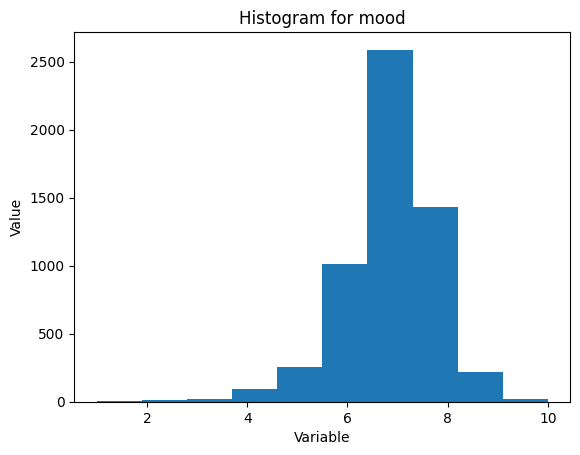

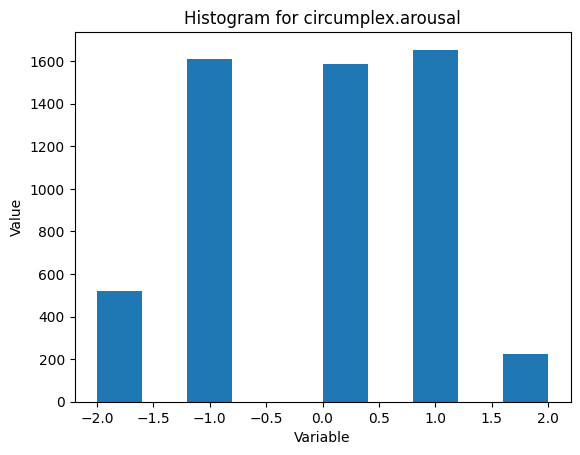

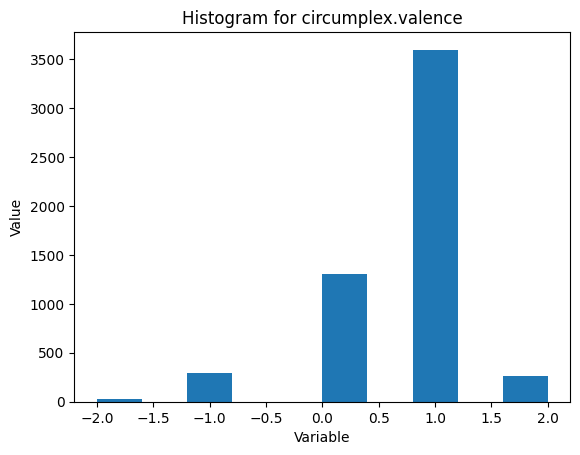

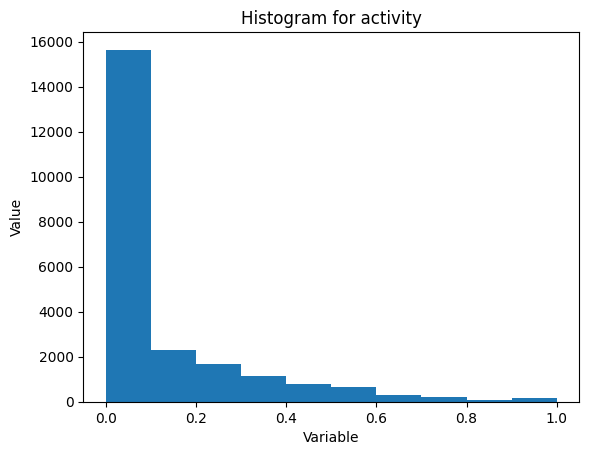

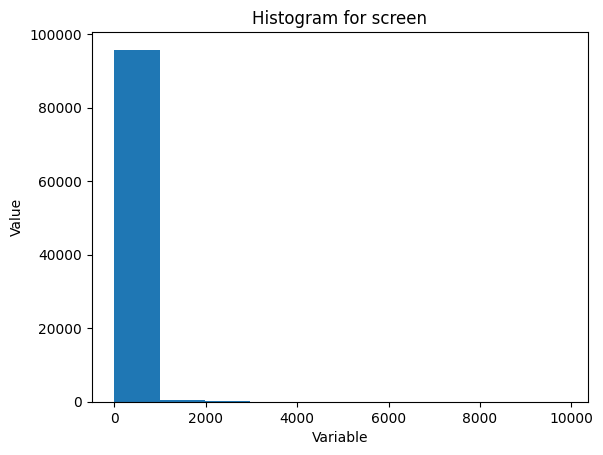

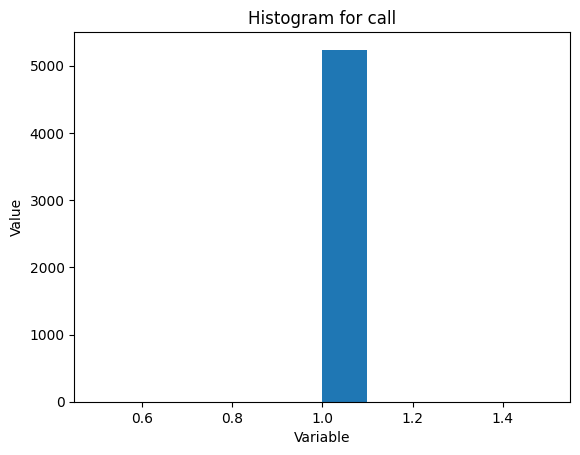

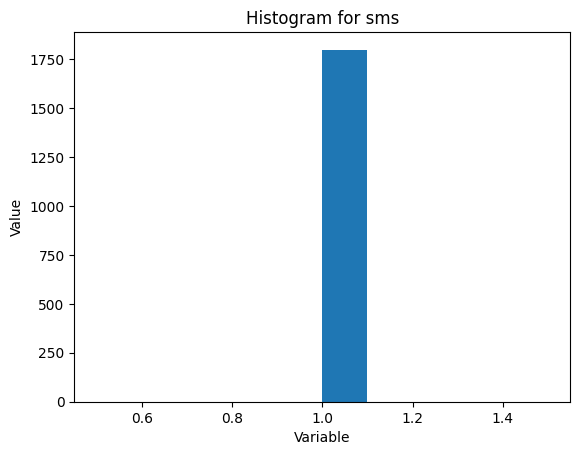

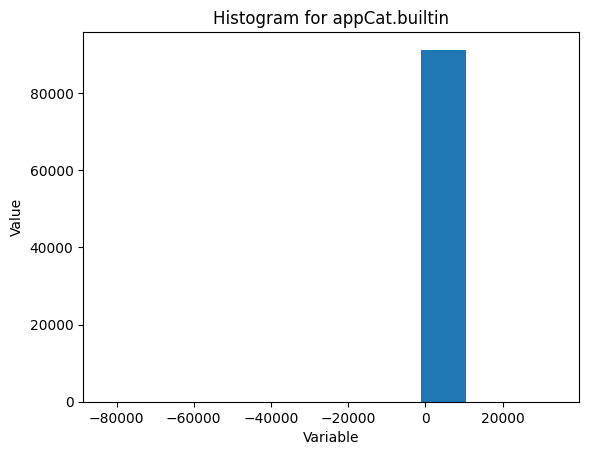

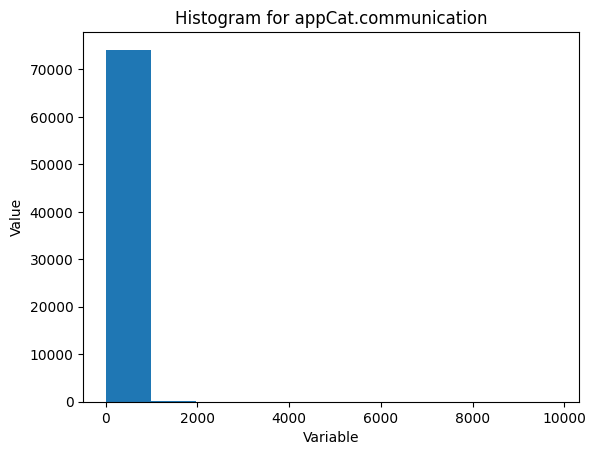

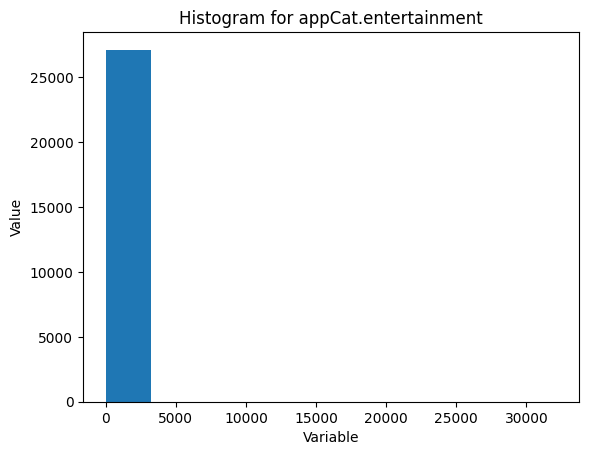

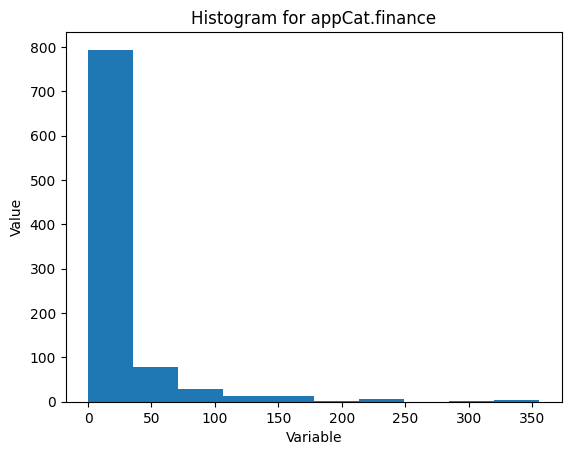

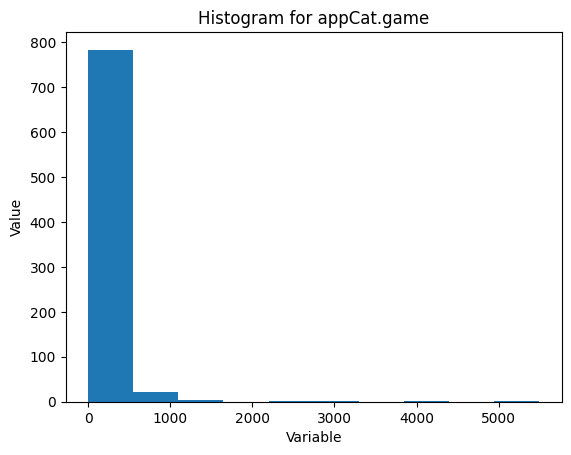

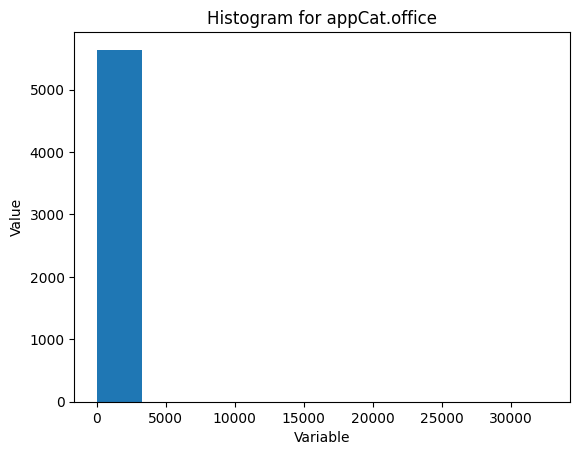

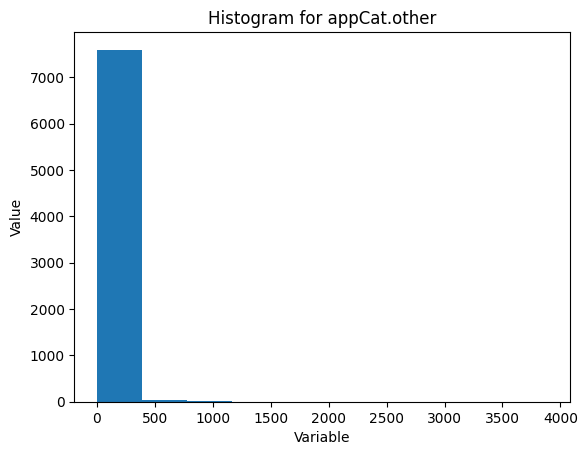

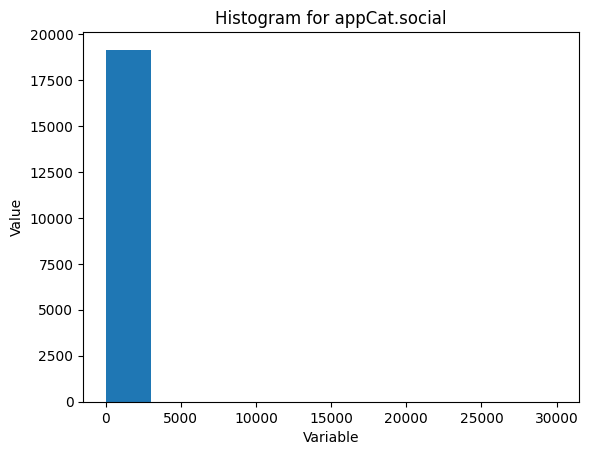

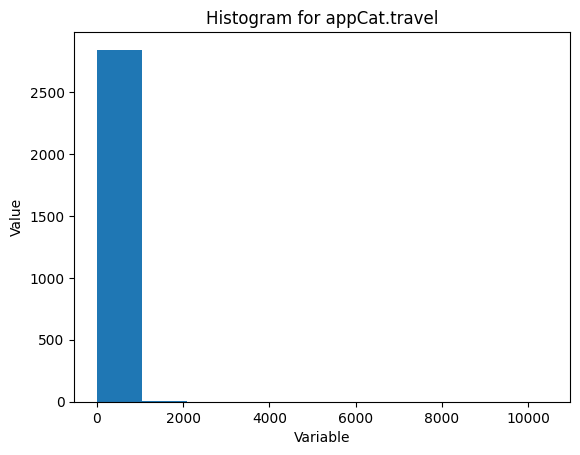

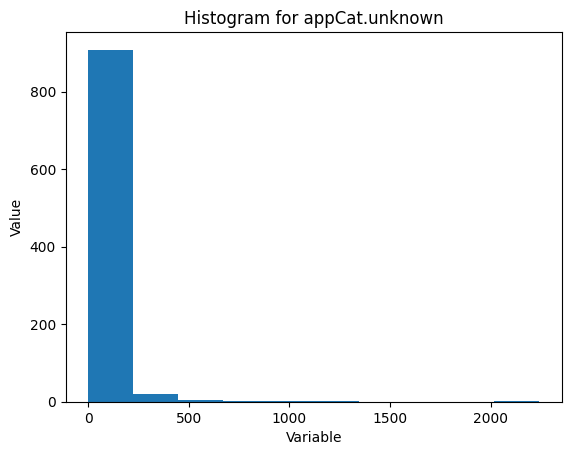

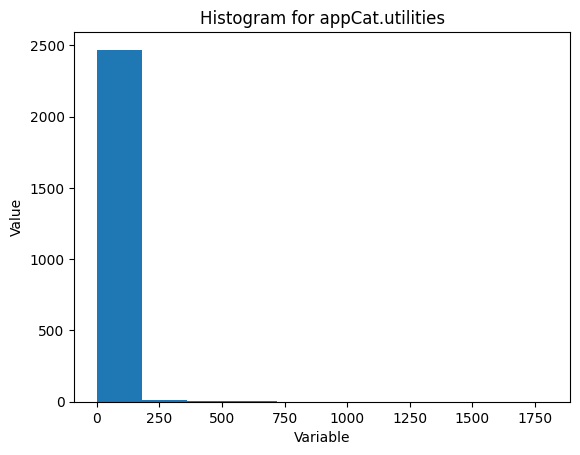

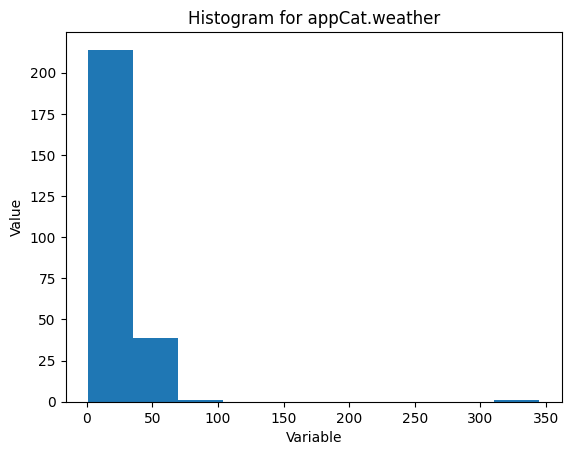

In [72]:
import matplotlib.pyplot as plt

variable_types = data['variable'].unique()

for variable_type in variable_types:
    plt.figure()
    plt.hist(data[data['variable'] == variable_type]['value'])
    plt.title(f'Histogram for {variable_type}')
    plt.xlabel('Variable')
    plt.ylabel('Value')

plt.show()


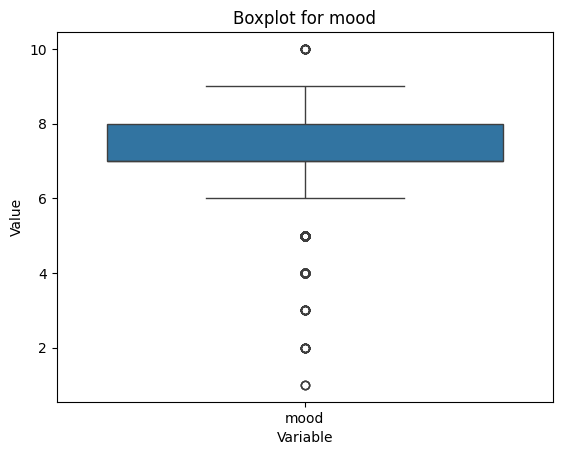

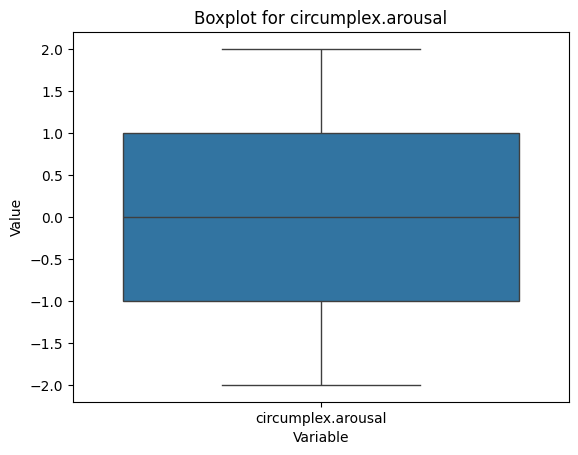

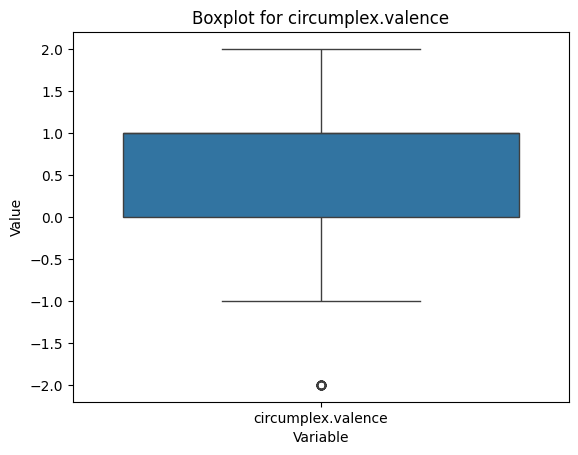

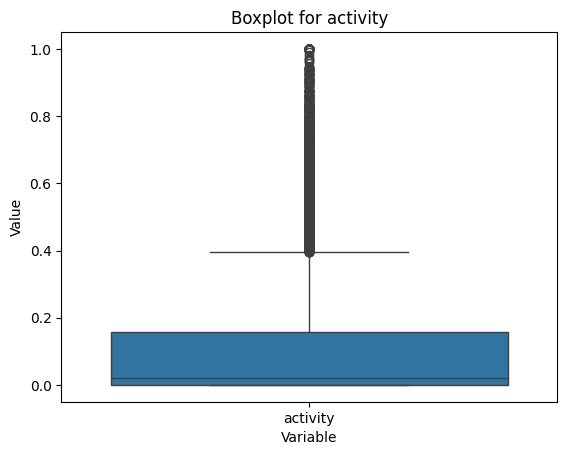

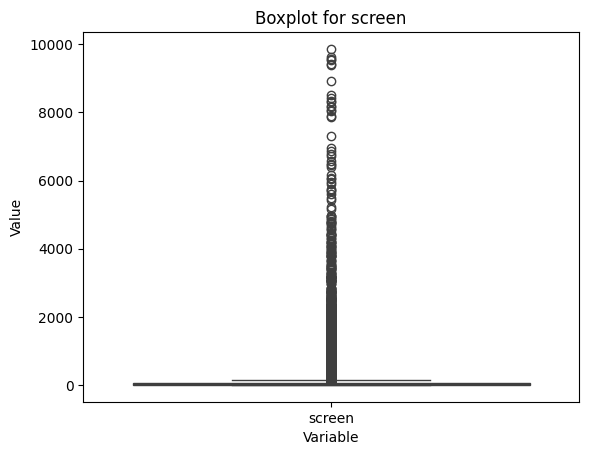

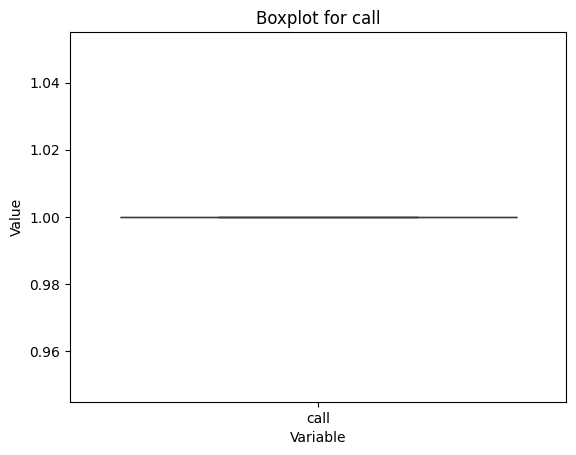

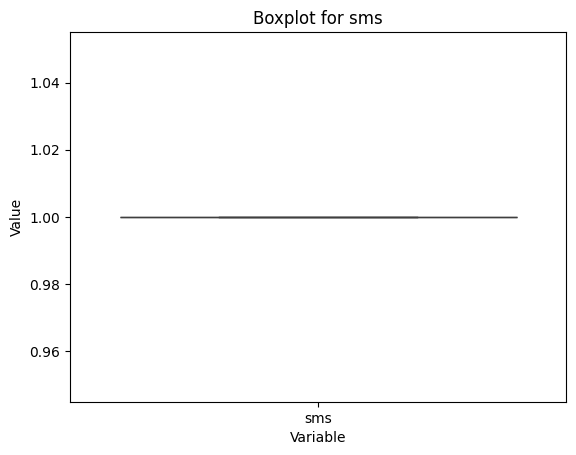

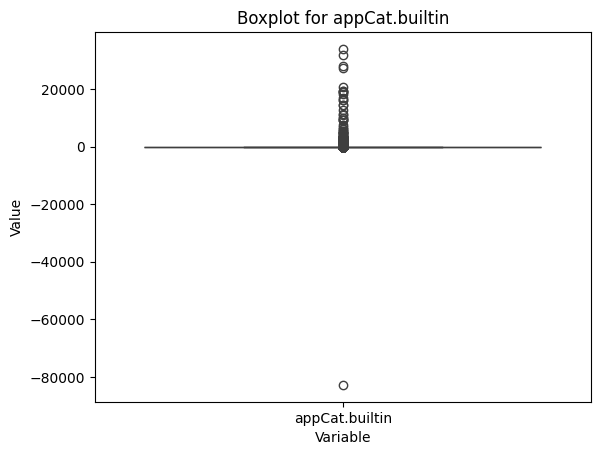

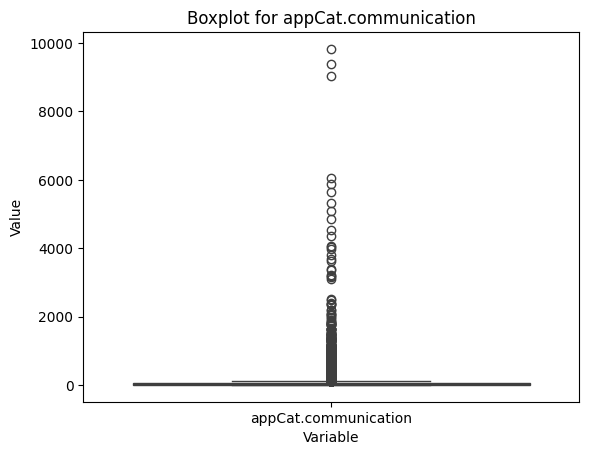

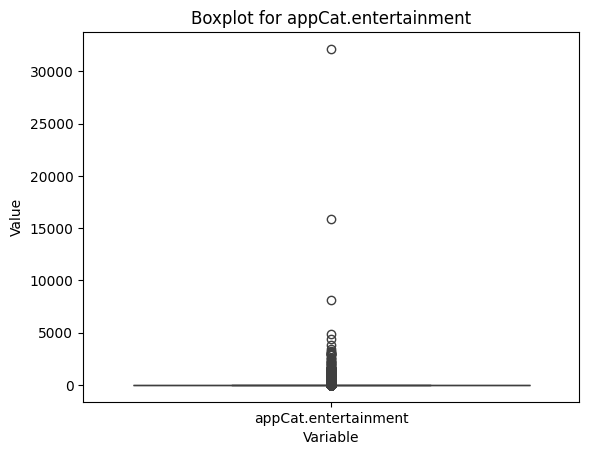

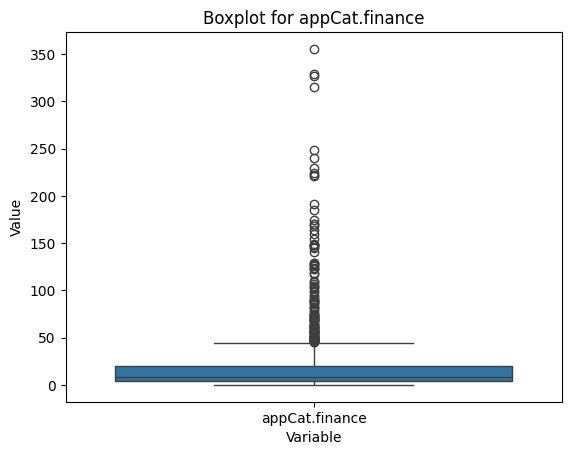

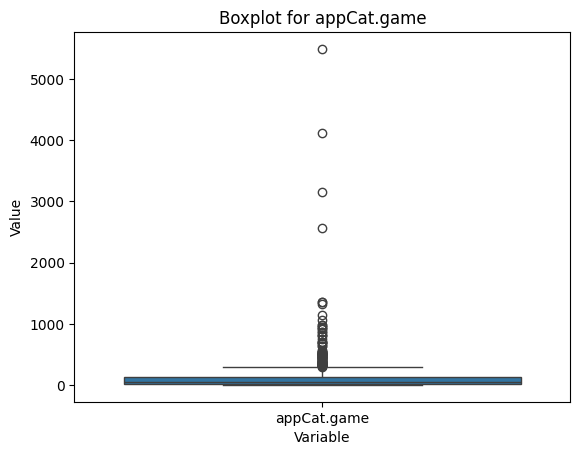

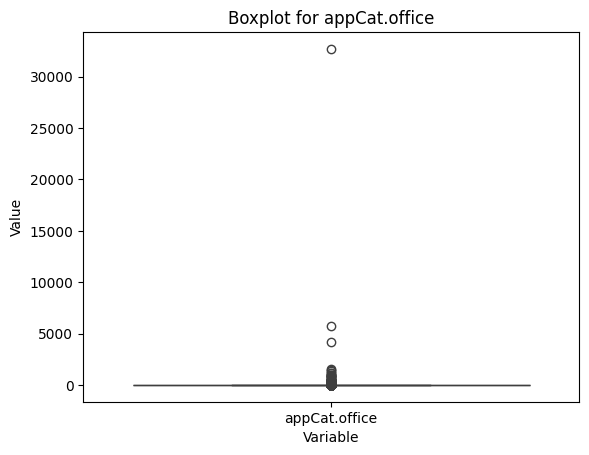

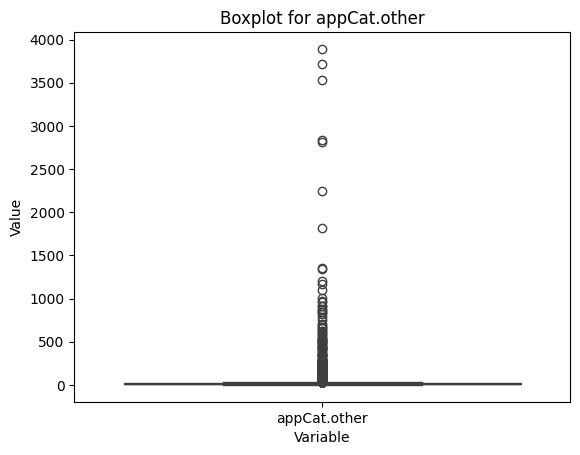

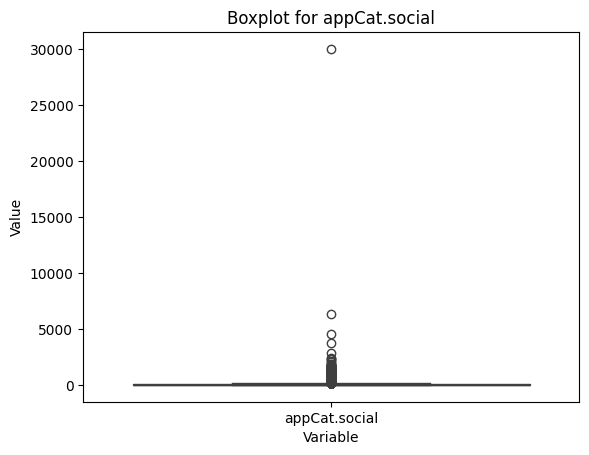

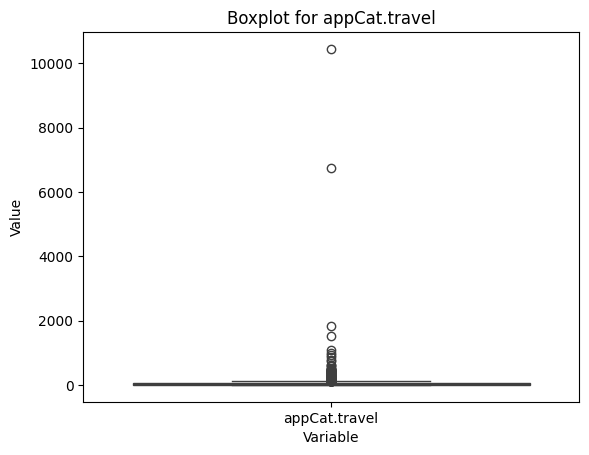

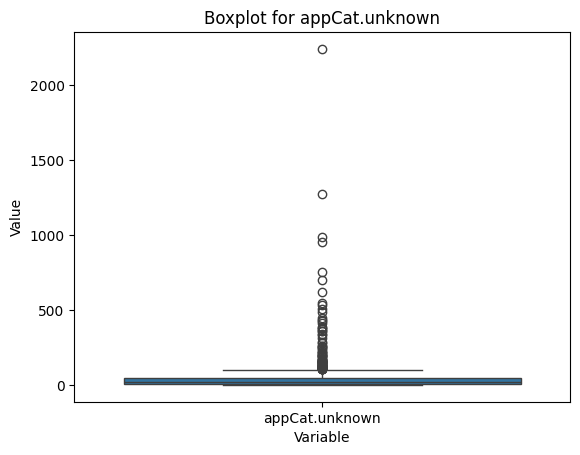

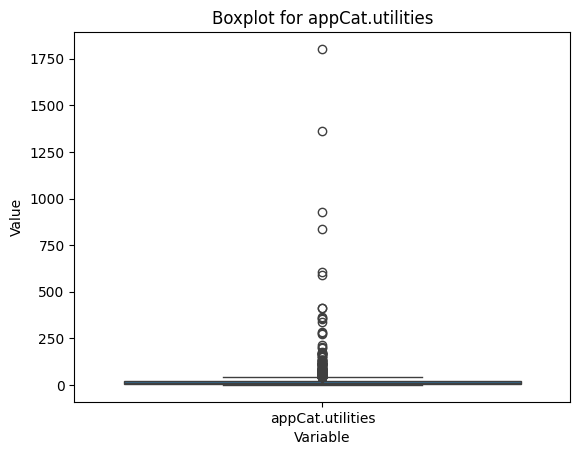

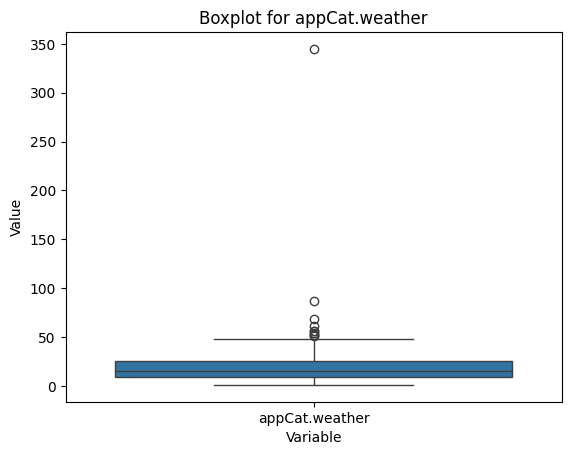

In [73]:
import seaborn as sns
variable_types = data['variable'].unique()

for variable_type in variable_types:
    plt.figure()
    sns.boxplot(x='variable', y='value', data=data[data['variable'] == variable_type])
    plt.title(f'Boxplot for {variable_type}')
    plt.xlabel('Variable')
    plt.ylabel('Value')

plt.show()

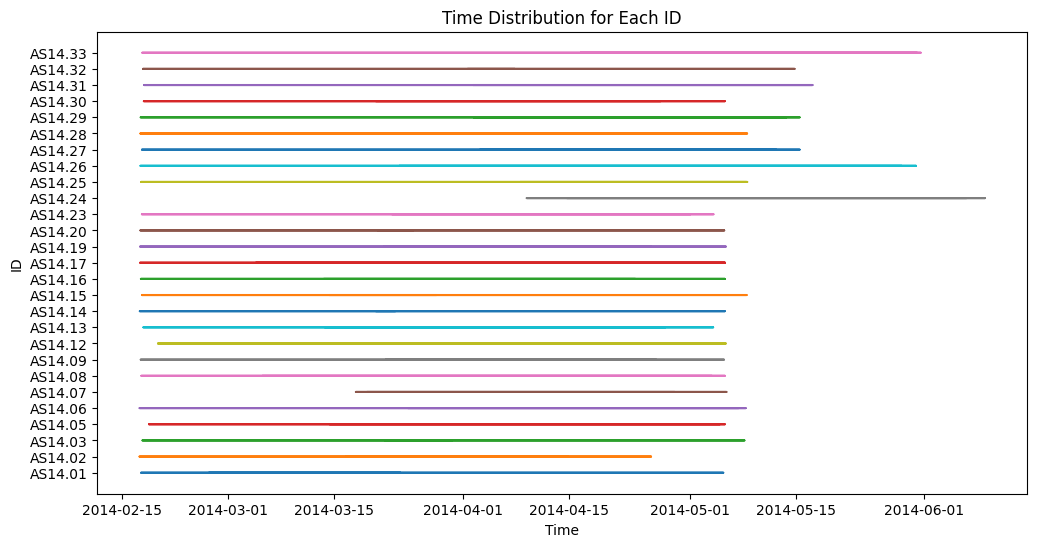

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

data.dropna(inplace=True)

data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(12, 6))
for id_value, group_data in data.groupby('id'):
    plt.plot(group_data['time'], group_data['id'], label=id_value)

plt.xlabel('Time')
plt.ylabel('ID')
plt.title('Time Distribution for Each ID')
plt.show()


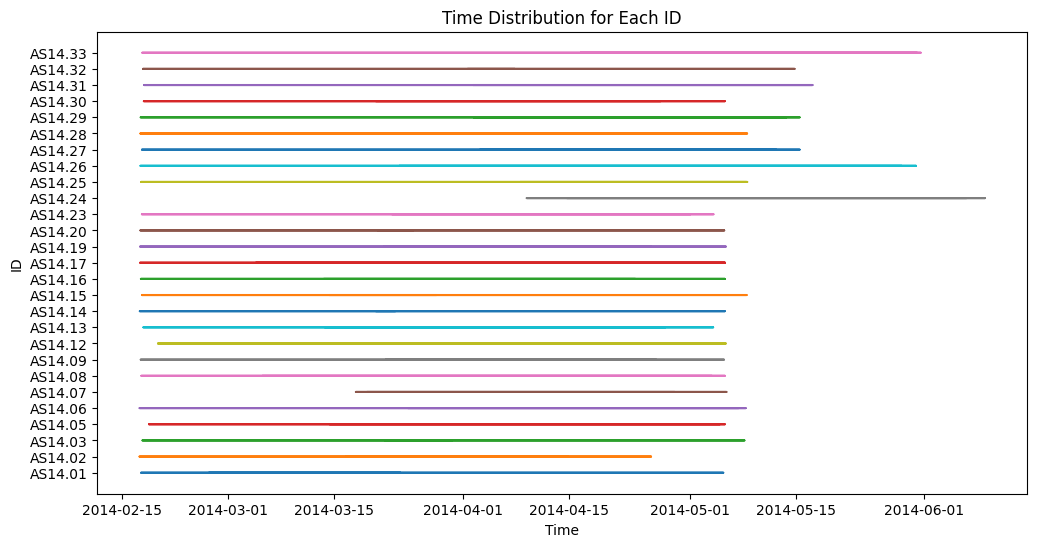

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data.dropna(inplace=True)

data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(12, 6))
for id_value, group_data in data.groupby('id'):
    plt.plot(group_data['time'], group_data['id'], label=id_value)

plt.xlabel('Time')
plt.ylabel('ID')
plt.title('Time Distribution for Each ID')
plt.show()


In [7]:
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [11]:
mood = data[data['variable'] == 'mood']

mood

,Unnamed: 0,id,time,variable,value,hour
0,1,AS14.01,2014-02-26 13:00:00,mood,6.0,13
1,2,AS14.01,2014-02-26 15:00:00,mood,6.0,15
2,3,AS14.01,2014-02-26 18:00:00,mood,6.0,18
3,4,AS14.01,2014-02-26 21:00:00,mood,7.0,21
4,5,AS14.01,2014-02-27 09:00:00,mood,6.0,9
...,...,...,...,...,...,...
5636,5637,AS14.33,2014-05-30 09:00:00,mood,8.0,9
5637,5638,AS14.33,2014-05-30 13:00:00,mood,6.0,13
5638,5639,AS14.33,2014-05-30 19:00:00,mood,8.0,19
5639,5640,AS14.33,2014-05-30 20:00:00,mood,6.0,20


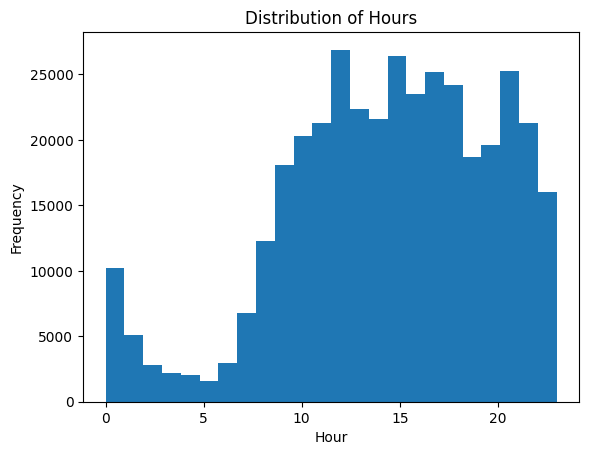

In [10]:
import matplotlib.pyplot as plt


# Extract the hour from the time column
data['hour'] = data['time'].dt.hour

# Create the histogram
plt.hist(data['hour'], bins=24)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Hours')
plt.show()


In [35]:
grouped_data = data

# Get unique values in the "variable" column
unique_variables = grouped_data['variable'].unique()

# Create new columns for each unique value in the "variable" column
for variable in unique_variables:
    grouped_data[variable] = grouped_data.loc[grouped_data['variable'] == variable, 'value']

# Drop the "variable" and "value" columns
grouped_data = grouped_data.drop(['variable', 'value'], axis=1)

grouped_data


# could you write some code that will make a new column for every unique value in the variables column, fill the value of the corresponding column that is mentioned in the variable record with the record in the variable column. do that for all and then drop the variable and value column, the rest of the data frame should stay the same



,Unnamed: 0,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,1,AS14.01,2014-02-26 13:00:00.000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AS14.01,2014-02-26 15:00:00.000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AS14.01,2014-02-26 18:00:00.000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AS14.01,2014-02-26 21:00:00.000,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AS14.01,2014-02-27 09:00:00.000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [6]:
pivot_df = data.pivot_table(index='id', columns='variable', values='value', aggfunc='first')
pivot_df

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
time,,,,,,,,,,,,,,,,,,,
2014-02-17 07:00:52.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:12:13.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:49:19.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-02-17 08:57:16.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-02-17 08:58:58.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-08 11:03:34.453,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:20.233,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:36.299,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


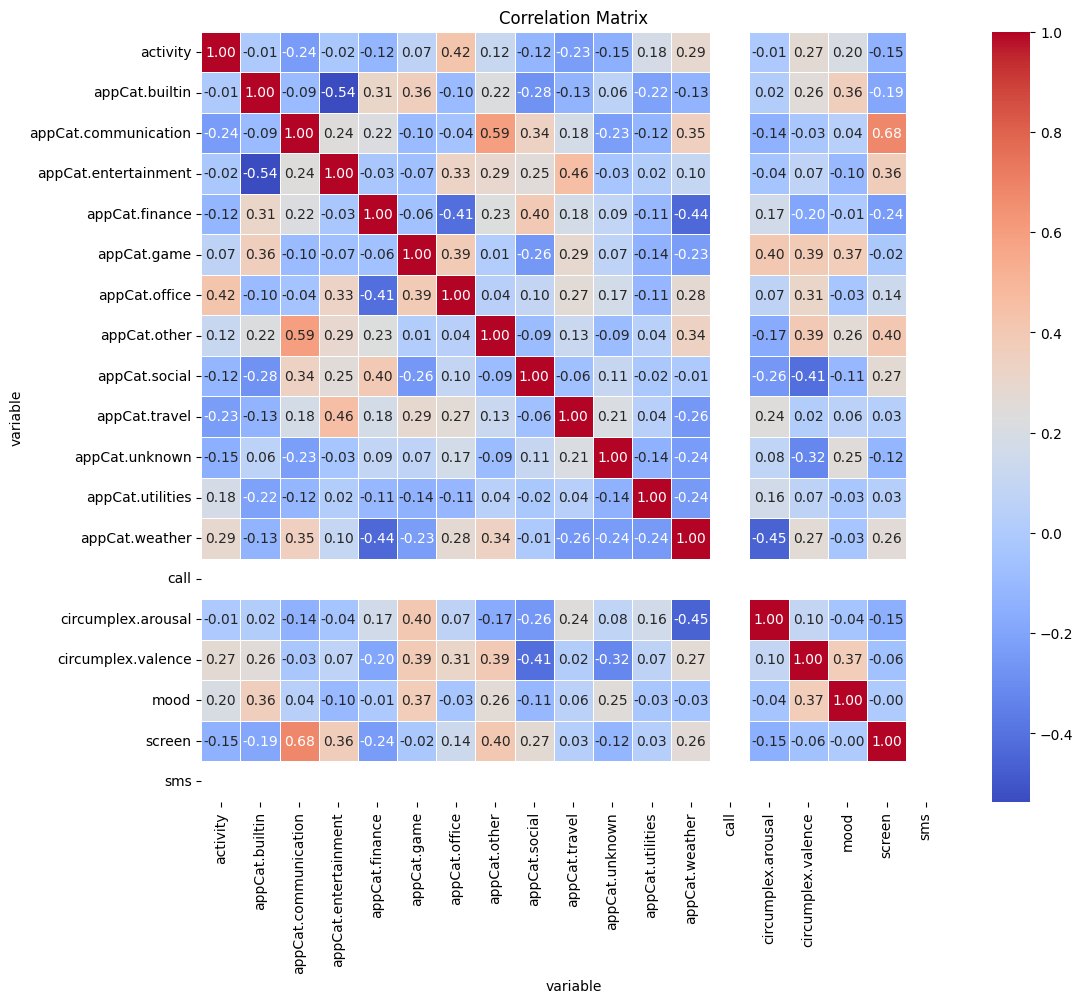

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = data.pivot_table(index='id', columns='variable', values='value', aggfunc='mean')
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [5]:
pivot_df

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,
AS14.01,0.090213,14.987378,49.736336,87.263831,20.847291,83.067250,26.475478,18.828746,71.359543,46.002133,29.243786,22.358442,30.386000,1.0,-0.243119,0.706161,7.067568,100.779564,1.0
AS14.02,0.270656,16.087972,31.337751,43.113950,NaN,NaN,NaN,17.747254,26.770813,21.155277,NaN,5.738643,NaN,1.0,-0.402516,0.289308,6.773585,36.274168,1.0
AS14.03,0.110581,69.564123,25.246729,37.055600,31.551319,NaN,35.083284,36.220289,4.550889,33.320333,83.844761,9.001742,25.603000,1.0,-0.072072,0.995495,7.583710,47.545957,1.0
AS14.05,0.069315,25.570045,50.581274,11.318877,NaN,NaN,21.127000,20.790175,64.465698,5.029000,21.936527,14.640861,NaN,1.0,-0.369748,0.721519,6.726141,62.627853,1.0
AS14.06,0.162015,59.035514,43.280673,10.194812,NaN,399.580467,35.341027,20.448133,77.157757,51.095435,46.998500,NaN,9.747250,1.0,-0.257426,0.631841,7.172414,86.089785,1.0
AS14.07,0.079533,-5.641348,41.835158,282.481473,NaN,14.065000,NaN,29.609977,112.488357,68.914519,51.093769,47.125111,NaN,1.0,-0.455497,0.429319,6.114583,95.988936,1.0
AS14.08,0.058934,21.207250,49.548562,100.085500,NaN,NaN,73.416833,29.076683,51.272420,107.899654,42.830760,14.123121,NaN,1.0,-0.214765,0.814815,6.749164,58.740835,1.0
AS14.09,0.078266,34.263609,34.916192,26.452130,35.257239,128.005500,5.647083,13.955142,46.836117,37.596783,44.294714,5.854567,16.324647,1.0,-0.139896,0.517949,6.918782,70.194092,1.0
AS14.12,0.124915,20.424737,42.033452,66.728194,18.126323,61.406944,42.152838,10.478020,75.220711,31.872604,6.699889,4.807875,51.049000,1.0,-0.027174,0.596591,6.221622,71.112549,1.0


In [152]:
pivot_df

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,
AS14.01,0.090213,14.987378,49.736336,87.263831,20.847291,83.067250,26.475478,18.828746,71.359543,46.002133,29.243786,22.358442,30.386000,1.0,-0.243119,0.706161,7.067568,100.779564,1.0
AS14.02,0.270656,16.087972,31.337751,43.113950,NaN,NaN,NaN,17.747254,26.770813,21.155277,NaN,5.738643,NaN,1.0,-0.402516,0.289308,6.773585,36.274168,1.0
AS14.03,0.110581,69.564123,25.246729,37.055600,31.551319,NaN,35.083284,36.220289,4.550889,33.320333,83.844761,9.001742,25.603000,1.0,-0.072072,0.995495,7.583710,47.545957,1.0
AS14.05,0.069315,25.570045,50.581274,11.318877,NaN,NaN,21.127000,20.790175,64.465698,5.029000,21.936527,14.640861,NaN,1.0,-0.369748,0.721519,6.726141,62.627853,1.0
AS14.06,0.162015,59.035514,43.280673,10.194812,NaN,399.580467,35.341027,20.448133,77.157757,51.095435,46.998500,NaN,9.747250,1.0,-0.257426,0.631841,7.172414,86.089785,1.0
AS14.07,0.079533,-5.641348,41.835158,282.481473,NaN,14.065000,NaN,29.609977,112.488357,68.914519,51.093769,47.125111,NaN,1.0,-0.455497,0.429319,6.114583,95.988936,1.0
AS14.08,0.058934,21.207250,49.548562,100.085500,NaN,NaN,73.416833,29.076683,51.272420,107.899654,42.830760,14.123121,NaN,1.0,-0.214765,0.814815,6.749164,58.740835,1.0
AS14.09,0.078266,34.263609,34.916192,26.452130,35.257239,128.005500,5.647083,13.955142,46.836117,37.596783,44.294714,5.854567,16.324647,1.0,-0.139896,0.517949,6.918782,70.194092,1.0
AS14.12,0.124915,20.424737,42.033452,66.728194,18.126323,61.406944,42.152838,10.478020,75.220711,31.872604,6.699889,4.807875,51.049000,1.0,-0.027174,0.596591,6.221622,71.112549,1.0


In [151]:
extracted_data = pivot_df[['appCat.unknown', 'circumplex.valence', 'mood', 'appCat.other', 'appCat.game', 'appCat.builtin', 'activity']]
# pivot_df
extracted_data

variable,appCat.unknown,circumplex.valence,mood,appCat.other,appCat.game,appCat.builtin,activity
id,,,,,,,
AS14.01,29.243786,0.706161,7.067568,18.828746,83.067250,14.987378,0.090213
AS14.02,NaN,0.289308,6.773585,17.747254,NaN,16.087972,0.270656
AS14.03,83.844761,0.995495,7.583710,36.220289,NaN,69.564123,0.110581
AS14.05,21.936527,0.721519,6.726141,20.790175,NaN,25.570045,0.069315
AS14.06,46.998500,0.631841,7.172414,20.448133,399.580467,59.035514,0.162015
AS14.07,51.093769,0.429319,6.114583,29.609977,14.065000,-5.641348,0.079533
AS14.08,42.830760,0.814815,6.749164,29.076683,NaN,21.207250,0.058934
AS14.09,44.294714,0.517949,6.918782,13.955142,128.005500,34.263609,0.078266
AS14.12,6.699889,0.596591,6.221622,10.478020,61.406944,20.424737,0.124915


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


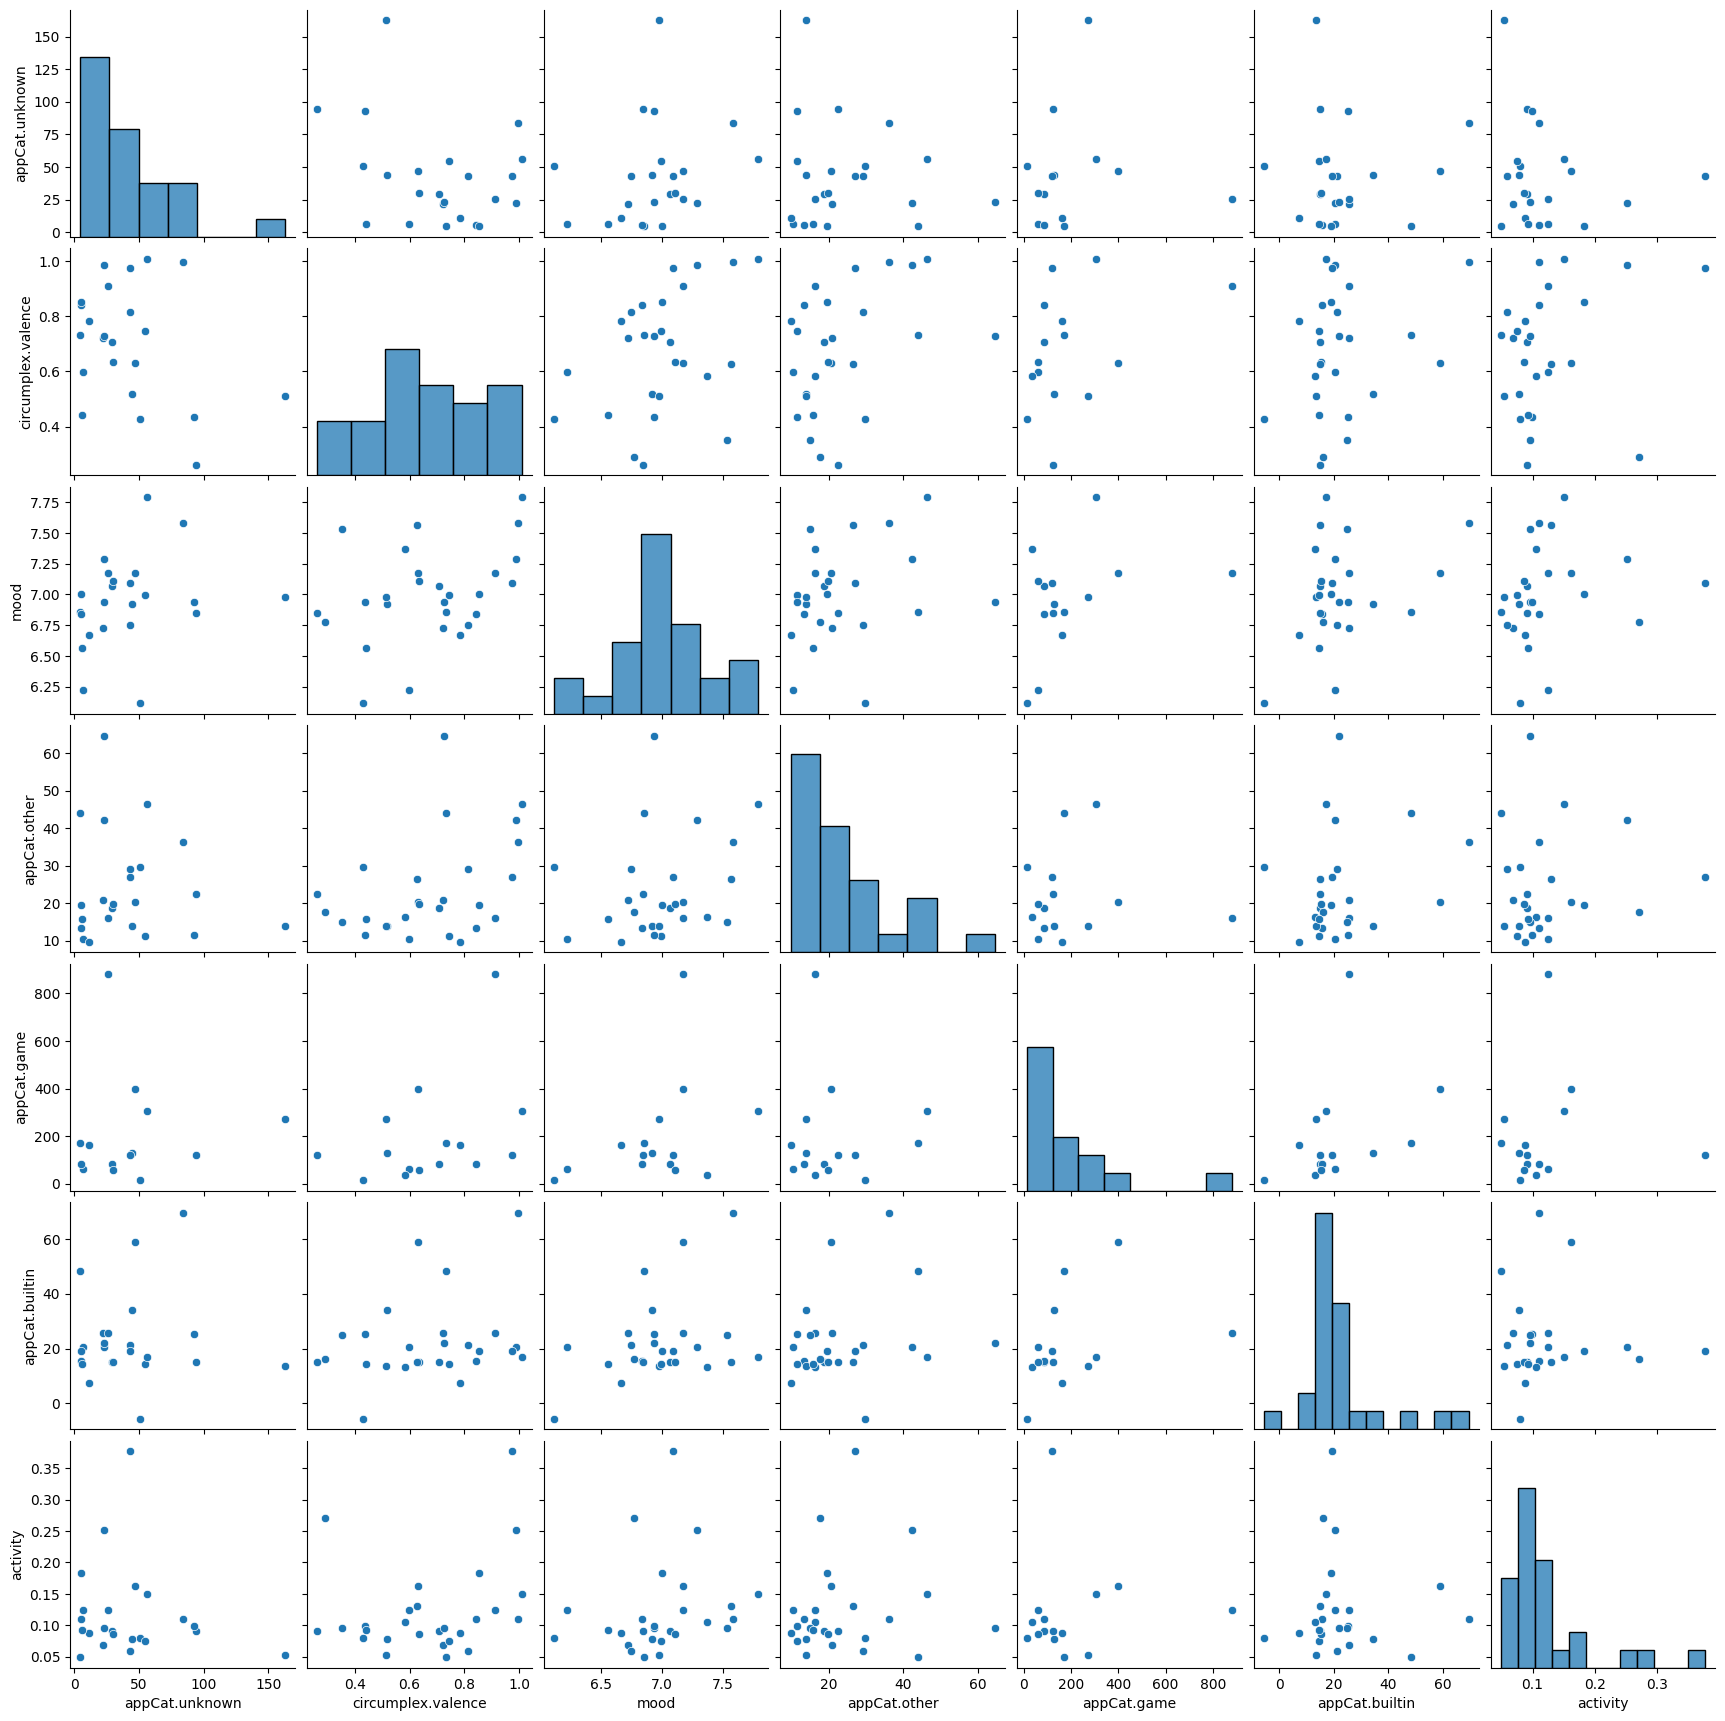

In [150]:
import seaborn as sns

sns.pairplot(data=extracted_data)
plt.show()


#TODO: scatterplot van de hoge correlatie



## Task 1 b

<div style="max-width: 50%;">
<details>
    <summary>Details</summary>    
    As the insights from Task 1A will have shown, the dataset you analyze contains quite some
    noise. Values are sometimes missing, and extreme or incorrect values are seen that are likely
    outliers you may want to remove from the dataset. We will clean the dataset in two steps: <br><br>
    - Apply an approach to remove extreme and incorrect values from your dataset. Describe
    what your approach is, why you consider that to be a good approach, and describe what
    the result of applying the approach is.<br><br>
    • Impute the missing values using two different approaches. Describe the approaches
    and study the impact of applying them to your data. Argue which one of the two ap-
    proaches would be most suitable and select that one to form your cleaned dataset. Also
    base yourself on scientific literature for making your choice.<br><br>
    Advanced: The advanced dataset contains a number of time series, select two approaches to
    impute missing values that are logical for such time series and argue for one of them based
    on the insights you gain. Also consider what to do with prolonged periods of missing data in
    a time series.
</details>
</div>

In [1]:
import pandas as pd

data = pd.read_csv('dataset_mood_smartphone.csv')

data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Task 1 c

<div style="max-width: 50%;">
<details>
    <summary>Details</summary>    
    While we now have a clean dataset, we can still take one step before we move to classification
    or regression that can in the end help to improve performance, namely feature engineering.
    As discussed during the lectures, feature engineering is a creative process and can involve
    or example the transformation of values (e.g. take the log of values given a certain distribution of values) or combining multiple features (e.g. two features that are more valuable
    combined than the two separate values). Think of a creative feature engineering approach
    for your dataset, describe it, and apply it. Report on why you think this is a useful enrichment
    of your dataset.<br><br>
    Advanced: Essentially there are two approaches you can consider to create a predictive model
    using this dataset (which we will do in the next part of this assignment): (1) use a machine
    learning approach that can deal with temporal data (e.g. recurrent neural networks) or you
    can try to aggregate the history somehow to create attributes that can be used in a more common machine learning approach (e.g. SVM, decision tree). For instance, you use the average
    mood during the last five days as a predictor. Ample literature is present in the area of temporal data mining that describes how such a transformation can be made. For the feature
    engineering, you are going to focus on such a transformation in this part of the assignment.
    This is illustrated in Figure 1.

![Figure 1: Predictive model](./images/task_1_figure_1.png)<br>
    In the end, we end up with a dataset with a number of training instances per patient (as
    you have a number of time points for which you can train), i.e. an instance that concerns
    the mood at t=1, t=2, etc. Of course it depends on your choice of the history you consider
    relevant from what time point you can start predicting (if you use a windows of 5 days of
    history to create attributes you cannot create training instances before the 6th day). To come to this dataset, you need to:<br><br>
    1. Define attributes that aggregate the history, draw inspiration from the scientific literature.<br>
    2. Define the target by averaging the mood over the entire day.<br>
    3. Create an instance-based dataset as described in Figure 1.<br>

</details>
</div>

Valid employee ID
